In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
plt.style.use('seaborn-colorblind')

# 3x3 Prediction vs Reference Scatterplot
With the model_dir variable it is possible to choose between the
different neural network architectures

In [2]:
# Model directory / Network architecture
model_dir = "OriginalFukami"

# Define the range of the time series
var = {0: "Hs", 1: "Tm02", 2: "Dir"}

# Define the points where the time series are extracted (in pixel)
xi = [69, 86, 69]
yi = [94, 104, 77] 

# Computer number of extraction points for easier acess
npts = len(xi)

# Save the figure?
save = True

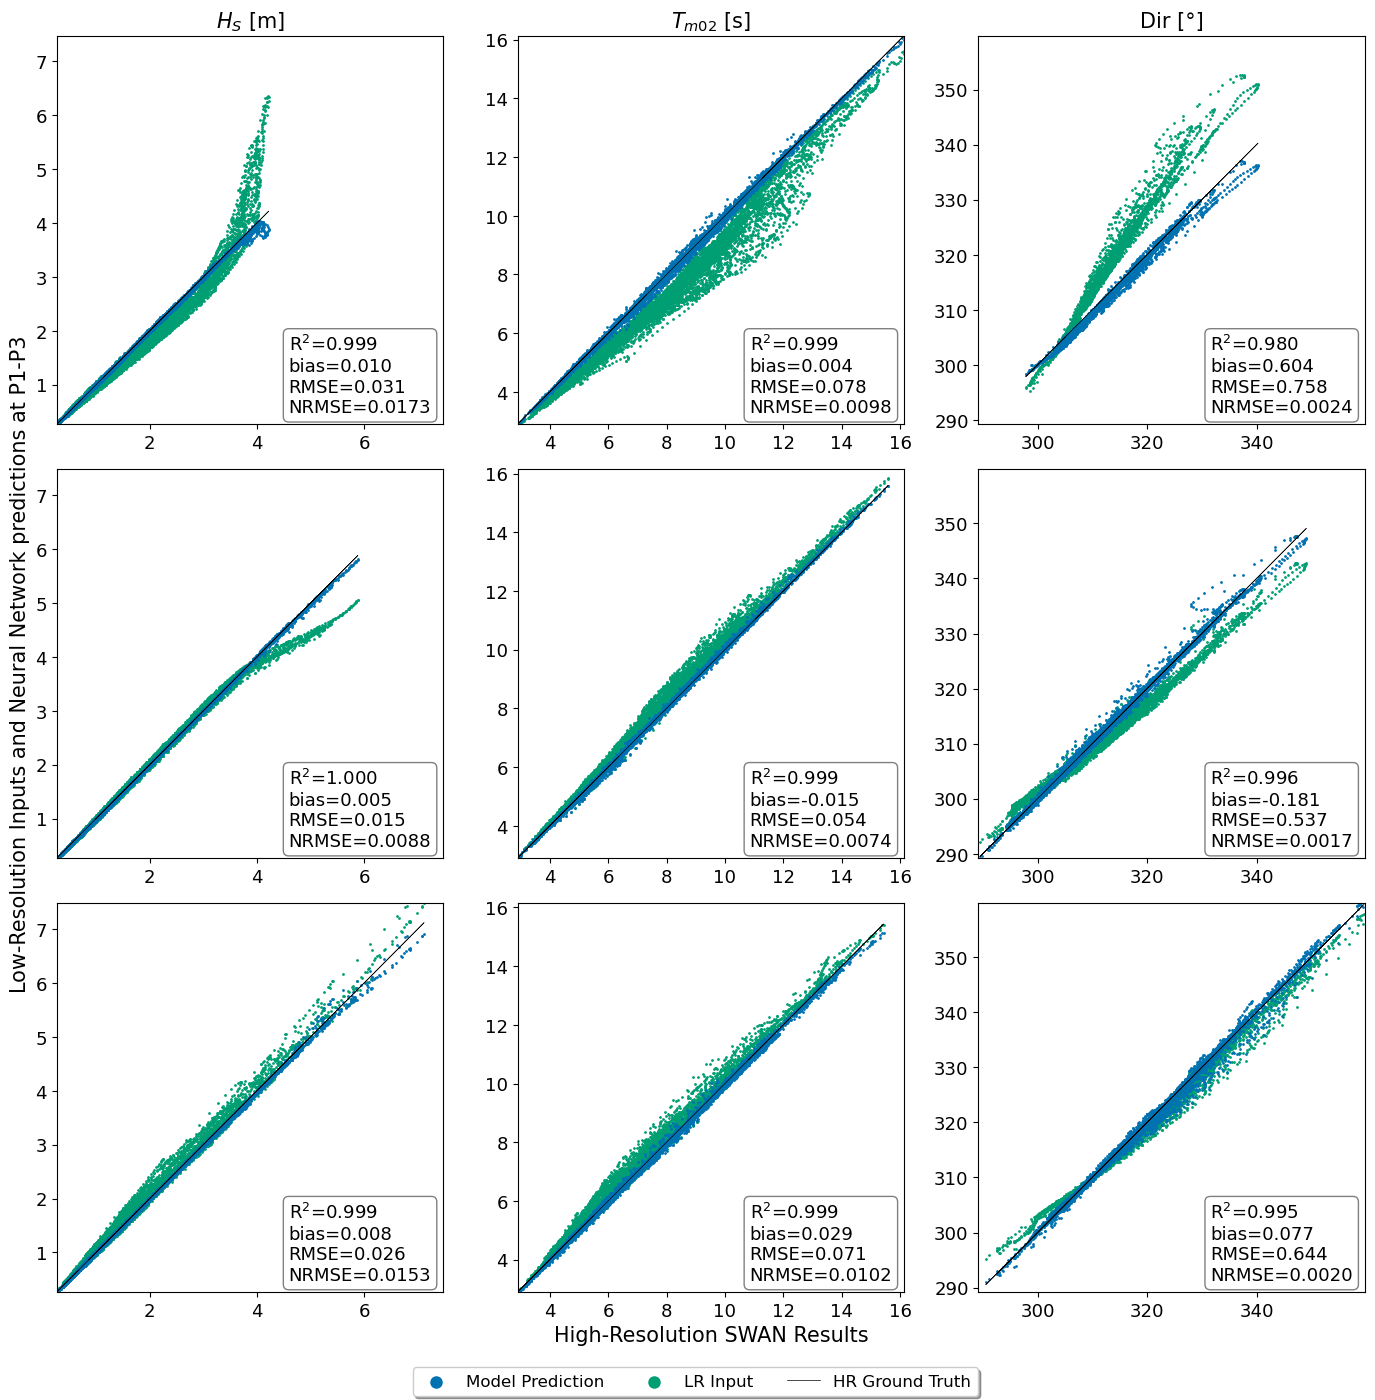

In [3]:
# Constants to easily change font sizes
LABELSIZE = 15
TICKLABELSIZE = 13
LEGENDFONTSIZE = 12
TITLESIZE = 15
TEXTSIZE = 13

# Various plot labels
xlabel = {0: r"$H_S$ ", 1: r"$T_{m02}$ ", 2: r"Dir "}
units = {0: "[m]", 1: "[s]", 2: "[°]"}

label1 = "Model Prediction"
label2 = "LR Input"
label3 = "HR Ground Truth"
labels = [label1, label2, label3]

fig, axs = plt.subplots(3, 3, figsize=(14,14))

for nvar in range(len(var)):
    # Determine max- and minval for each column to determine axis limits
    min_val = np.infty
    max_val = -np.infty
    for npt in range(npts):
        # Load time series
        path_dir = Path(f"Data/Time_Series/{model_dir}")
        fpath = path_dir / f"Var_{var[nvar]}_posxy_{xi[npt]}_{yi[npt]}.npy"

        arr = np.load(fpath)

        prediction = arr[0,:]
        HR = arr[1,:]
        LR = arr[2,:]
        
        
        # Compute various statistics
        HR_mean = np.nanmean(HR)
        pred_mean = np.nanmean(prediction)
        
        # Bias
        bias = np.nanmean(HR - prediction)
        # RMSE 
        rmse = np.sqrt(np.nanmean((HR - prediction)**2))
        # SI
        nrmse = rmse/HR_mean
        # R^2 Coefficient of determination
        SSres = np.nansum((HR - prediction)**2)
        SStot = np.nansum((HR - HR_mean)**2)
        Rsq = 1 - SSres/SStot
        
        
        text = "\n".join([fr"R$^2$={Rsq:.3f}",
                          f"bias={bias:.3f}",
                          f"RMSE={rmse:.3f}",
                          f"NRMSE={nrmse:.4f}"]) 
        
        textbox = axs[npt, nvar].annotate(text, (0.6, 0.03), xycoords="axes fraction", fontsize=TEXTSIZE,
                                          bbox=dict(boxstyle="round", facecolor='none', edgecolor="grey"))
        
        
        # Draw the scatter plots
        line1 = axs[npt, nvar].scatter(HR, prediction, s=1, label=label1, zorder=2)
        line2 = axs[npt, nvar].scatter(HR, LR, s=1, label=label2, zorder=1)
        line3, = axs[npt, nvar].plot(HR, HR, '-k', linewidth=0.5, label=label3)
        
        axs[0, nvar].set_title(xlabel[nvar] + units[nvar], fontsize=TITLESIZE)
        axs[npt, nvar].tick_params(axis='both', labelsize=TICKLABELSIZE)
        
        axs[1, 0].set_ylabel("Low-Resolution Inputs and Neural Network predictions at P1-P3", size=LABELSIZE)
        axs[2, 1].set_xlabel("High-Resolution SWAN Results", size=LABELSIZE)
        
        # Determine x-, and y-limits for each column
        max_val_cur = max(np.nanmax(LR), np.nanmax(prediction), np.nanmax(HR))
        min_val_cur = min(np.nanmin(LR), np.nanmin(prediction), np.nanmin(HR))
        
        if max_val < max_val_cur:
            max_val = max_val_cur
        if min_val > min_val_cur:
            min_val = min_val_cur        
        
        
    axs[0, nvar].set_xlim(min_val, max_val)
    axs[0, nvar].set_ylim(min_val, max_val)

    axs[1, nvar].set_xlim(min_val, max_val)
    axs[1, nvar].set_ylim(min_val, max_val)

    axs[2, nvar].set_xlim(min_val, max_val)
    axs[2, nvar].set_ylim(min_val, max_val)
        

handles = [line1, line2, line3]
fig.legend(handles, labels, loc=[0.3, 0.003], markerscale=8,
           fancybox=True, shadow=True, ncol=3, fontsize=LEGENDFONTSIZE)

plt.tight_layout()

fig.subplots_adjust(bottom=0.073)


# Output folder and file name
fdir = Path("Plots")
fname = f"ReferenceVsPrediction_mdir{model_dir}.png"

if save:
    if not fdir.exists():
        fdir.mkdir()
    plt.savefig(fdir / fname)
    
plt.show()